### A script to plot spatial Climate Data

In [4]:
import xarray as xr
import numpy as np
import cmocean # for perceptually uniform colormaps
import cartopy as cr # for geographic mapping
import cartopy.crs as ccrs # for map projections
import matplotlib.pyplot as plt # plotting tool
import cartopy.feature as cfeature # to add coastlines, land and ocean
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from descartes import PolygonPatch
import matplotlib.path as mplPath
from shapely.geometry.polygon import Polygon
import geopandas as gpd
import shapefile as shp
import regionmask

In [6]:
ds = xr.open_dataset('D:/Folder_2023/Research/Joan/April_27.nc')
#ds

In [4]:
##Read the shapefile
sf = gpd.read_file('D://Folder_2023//Research/Joan//lv_basin.shp')  ## Used in Masking
sf2 = shp.Reader('D://Folder_2023//Research/Joan//lv_basin.shp')

In [5]:
## Mask to the shapefile
ds1 = regionmask.mask_3D_geopandas(sf, ds.X, ds.Y, lon_name='Lon', lat_name='Lat')
ds2 = ds.where(ds1)

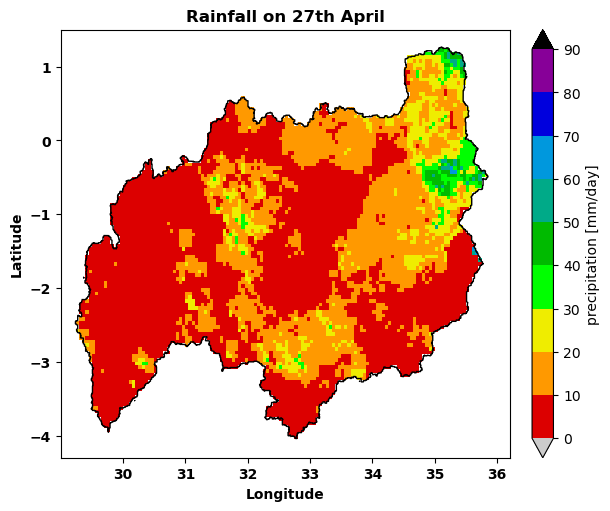

In [6]:
from matplotlib.colors import ListedColormap
none_map = ListedColormap(['none'])
fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 5))

## Plotting the figure
for poly in sf2.shapes():
    poly_geo=poly.__geo_interface__
    ax.add_patch(PolygonPatch(poly_geo, fc='None', ec='black', alpha=1, fill='False', zorder=2))

    ds2.prcp.plot(cmap=plt.cm.nipy_spectral_r,extend='both',levels=np.arange(0, 100, 10))
    plt.ylabel('Latitude',fontsize=10, fontweight='bold')
    plt.xlabel('Longitude',fontsize=10, fontweight='bold')
    plt.title('Rainfall on 27th April',fontsize=12, fontweight='bold')
    plt.xticks(size = 10, fontweight='bold')
    plt.yticks(size = 10, fontweight='bold')
   # plt.subplots_adjust(bottom=0.08, right=0.8, top=0.8)
    #fig.colorbar(cs, ax=ax,cax = plt.axes([0.85, 0.1, 0.018, 0.6]), label='Seasonal Rainfall(mm/month)')
    plt.savefig("D:/Folder_2023/Research/Joan/RFE_April 27.png")

### Riziki Analaysis 

In [57]:
ds = xr.open_dataset('D:/Folder_2023/Research/Riziki/OND_CLIM/clim_oct_1992-2021.nc')
#ds

In [58]:
##Read the shapefile
sf = gpd.read_file('D://Folder_2023//Research//Riziki//OND_CLIM//Zanzibar_shapefile//Zanzibar_disolved.shp')  ## Used in Masking
sf2 = shp.Reader('D://Folder_2023//Research//Riziki//OND_CLIM//Zanzibar_shapefile//Zanzibar.shp')

In [59]:
## Mask to the shapefile
ds1 = regionmask.mask_3D_geopandas(sf, ds.Lon, ds.Lat, lon_name='Lon', lat_name='Lat')
ds2 = ds.where(ds1)

### Jesus Loves You

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


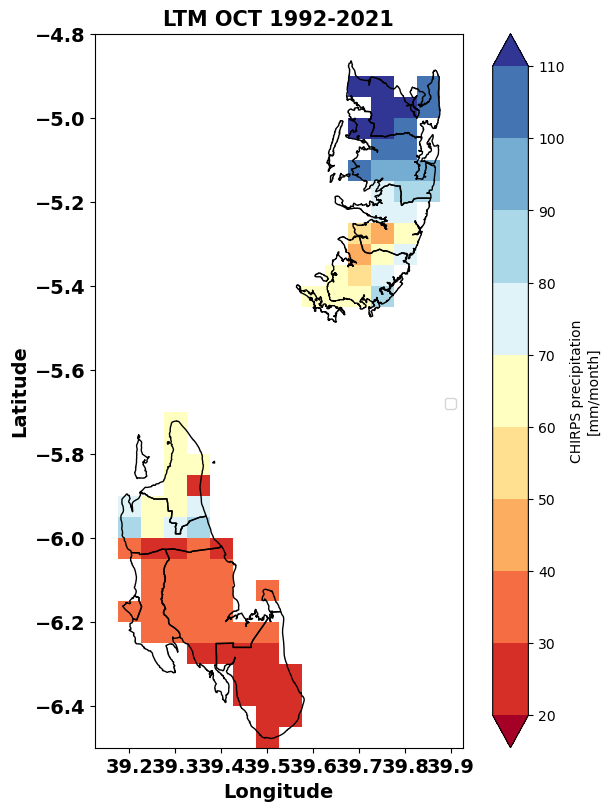

In [72]:
from matplotlib.colors import ListedColormap
none_map = ListedColormap(['none'])
fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 8))

## Plotting the figure
for poly in sf2.shapes():
    poly_geo=poly.__geo_interface__
    ax.add_patch(PolygonPatch(poly_geo, fc='None', ec='black', alpha=1, fill='False', zorder=2))
    
ds2.precipitation.sel(Lon=slice(39.1,39.9),Lat=slice(-6.5,-4.8)).plot(cmap=plt.cm.RdYlBu, extend='both',levels=np.arange(20, 115, 10))
plt.title('LTM OCT 1992-2021',fontsize=15, fontweight='bold')
plt.xticks(size = 14, fontweight='bold')
plt.yticks(size = 14, fontweight='bold')
##labling the axis
plt.ylabel('Latitude',fontsize=14, fontweight='bold')
plt.xlabel('Longitude',fontsize=14, fontweight='bold')
##ploting the legend
#plt.subplots_adjust(bottom=0.08, right=0.8, top=0.8)
###color bar
#fig.colorbar(cs, ax=ax,cax = plt.axes([0.85, 0.1, 0.018, 0.6]), label='Seasonal Rainfall(mm/month)')